# **Assignment – Model Selection**
Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# **1.Reading the data to python environment**

In [7]:
data=pd.read_csv('/content/titanic_dataset .csv')

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Preprocessing**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data=data.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [12]:
data=pd.get_dummies(data,drop_first=True,dtype=int)

In [13]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [15]:
'''
sns.pairplot(data)
'''

'\nsns.pairplot(data)\n'

<Axes: >

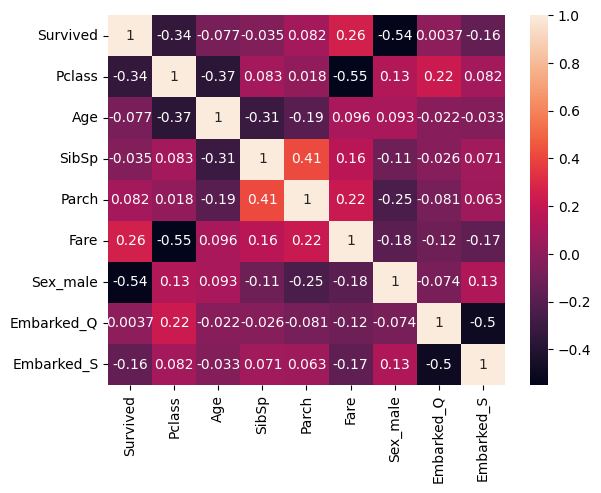

In [16]:
sns.heatmap(data.corr(),annot=True)

There are no strongly corrleated features affecting the Survived column

<ipython-input-17-221ceea10ca9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=data,palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

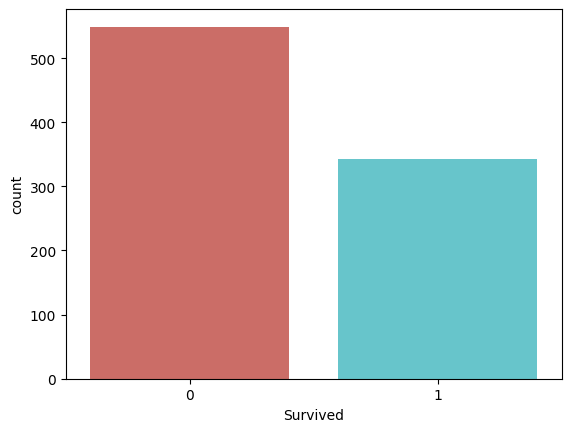

In [17]:
sns.countplot(x='Survived',data=data,palette='hls')

Number of people not survived is nearly double of not survived

Same number of recors for the three species of flowers

In [18]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [19]:
parch_gp=data.groupby(data['Parch'])
parch_gp.mean()

,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
Parch,,,,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774,0.713864,0.101770,0.713864
1,0.550847,2.203390,24.422000,1.084746,46.778180,0.491525,0.050847,0.694915
2,0.500000,2.275000,17.216912,2.062500,64.337604,0.387500,0.012500,0.812500
3,0.600000,2.600000,33.200000,1.000000,25.951660,0.200000,0.000000,0.800000
4,0.000000,2.500000,44.500000,0.750000,84.968750,0.500000,0.000000,1.000000
5,0.200000,3.000000,39.200000,0.600000,32.550000,0.200000,0.200000,0.800000
6,0.000000,3.000000,43.000000,1.000000,46.900000,0.000000,0.000000,1.000000


In [20]:
def age_ap(cols):
  Age=cols[0]
  Parch=cols[1]

  if (pd.isnull(Age)):
    if Parch==0:
      return 32
    elif Parch==1:
      return 24
    elif Parch==2:
      return 17
    elif Parch==3:
      return 33
    elif Parch==4:
      return 45
    else:
      return 30

  else:
    return Age

In [21]:
data['Age']=data[['Age','Parch']].apply(age_ap,axis=1)
data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

[]

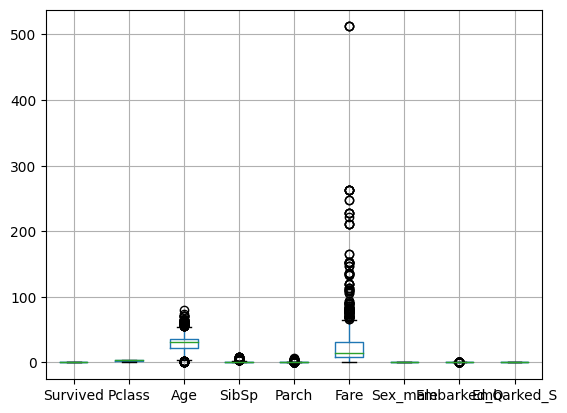

In [22]:
data.boxplot(return_type='dict')
plt.plot()

In [23]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [24]:
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score



In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [27]:
import joblib
from joblib import dump, load
dump(
  [x,y,x_train, x_test, y_train, y_test],
  "/content/model_data.joblib")

['/content/model_data.joblib']

In [28]:
x,y,x_train, x_test, y_train, y_test=load("/content/model_data.joblib")

# **KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [30]:
metric_k=[]
neighbors=np.arange(3,15)

In [31]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

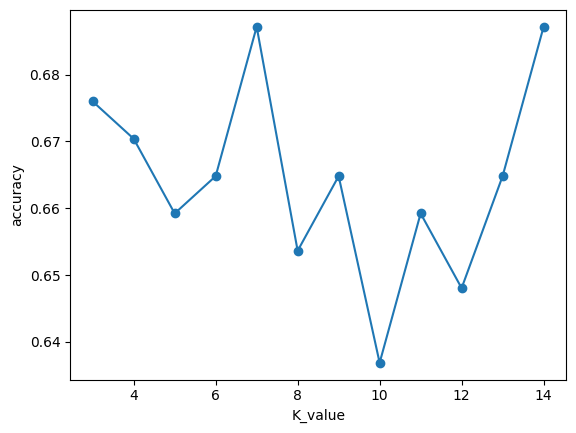

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [33]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_knn)
print(f"Accuracy:{accuracy}")

Accuracy:0.6871508379888268


# **After standard scaling**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [35]:
import joblib
from joblib import load,dump
x,y,x_train, x_test, y_train, y_test=load("/content/model_data.joblib")

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [37]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [38]:
metric_k=[]
neighbors=np.arange(3,15)

In [39]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

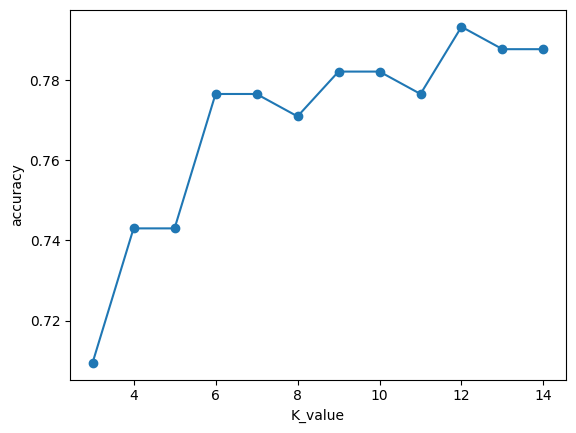

In [40]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [41]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [42]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('precision_score:',precision_score(y_test,y_pred_knn))
print('recall_score:',recall_score(y_test,y_pred_knn))
print('f1_score:',f1_score(y_test,y_pred_knn))


Accuracy: 0.7932960893854749
precision_score: 0.8275862068965517
recall_score: 0.64
f1_score: 0.7218045112781956


kFold

In [43]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=10,random_state=42,shuffle=True)

In [44]:
cv_score_sr=cross_val_score(classifier,x,y,cv=cv)

In [45]:
print(cv_score_sr)

[0.74444444 0.74157303 0.65168539 0.69662921 0.66292135 0.74157303
 0.65168539 0.73033708 0.6741573  0.73033708]


In [46]:
print(cv_score_sr.mean())

0.702534332084894


kFold

In [47]:
from sklearn.model_selection import StratifiedKFold
kf=KFold(n_splits=10)

In [48]:
cv_score_sr=cross_val_score(classifier,x,y,cv=kf)

In [49]:
print(cv_score_sr)

[0.61111111 0.6741573  0.66292135 0.69662921 0.69662921 0.71910112
 0.73033708 0.73033708 0.73033708 0.73033708]


In [50]:
print(cv_score_sr.mean())

0.6981897627965044


Stratified K fold

In [51]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

In [52]:
cv_score_sr=cross_val_score(classifier,x,y,cv=stratified_cv)

In [53]:
print(cv_score_sr)

[0.63333333 0.62921348 0.6741573  0.74157303 0.73033708 0.68539326
 0.73033708 0.73033708 0.69662921 0.70786517]


In [54]:
print(cv_score_sr.mean())

0.6959176029962546


# **SVM model**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [5]:
import joblib
from joblib import load,dump
x,y,x_train, x_test, y_train, y_test=load("/content/model_data.joblib")

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [7]:
from sklearn.svm import SVC
sv_cl_li=SVC(kernel='linear')
sv_cl_li.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
y_pred=sv_cl_li.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [10]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7653631284916201


In [11]:
print(confusion_matrix(y_test,y_pred))

[[88 16]
 [26 49]]


kFold

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [14]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


In [15]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [17]:
import numpy as np
score = cross_val_score(sv_cl_li, x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.21787709 -0.23595506 -0.15730337 -0.26404494 -0.19101124]
rmse= 0.46


Stratified K fold

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=3)

In [ ]:
cv_score_sr=cross_val_score(sv_cl_li,x,y,cv=stratified_cv)

In [ ]:
print(cv_score_sr)

In [ ]:
print(cv_score_sr.mean())